# cc

In [17]:
# import pvalue_gpu2 as conllh_itself
import pvalue_gpu1 as conllh

import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import random

import json

In [18]:
def save_read_json(srcscore, save_name, mode):
    '''save list to json or read json to list'''
    if mode == 'save':
        save_data = {}
        save_data['srcscore'] = srcscore
        with open(save_name, 'w') as f:
            json.dump(save_data, f)
    elif mode == 'read':
        with open(save_name, 'r') as f:
            save_data = json.load(f)
        srcscore = save_data['srcscore']
        return srcscore

In [19]:
# read srctotgts-->bartscore{sub} as numerator
# read model_s2ts-->bartscore_{i} and sum them for denominator
srctotgts, random_s2ts, model_s2ts = conllh.save_read_json(None,None,None, '../cc_bartscore', mode='read')

In [20]:
# calculate p-value

cc_p_values = []

for idx_global in range(len(srctotgts)):
    #if idx_global != 0: continue
    for i in range(len(srctotgts[idx_global])):
        ratio_sub = srctotgts[idx_global][i]
        less_number_sub = 0
        # for modified_sentence in random_sent[i]:
        for j in model_s2ts[idx_global][i]:
            if j>ratio_sub: less_number_sub+=1
        p_value = less_number_sub/len(model_s2ts[idx_global][i]) if less_number_sub>0 else 1/1000 #1/len(model_s2ts[idx_global][i])#1/1000
        cc_p_values.append(p_value)


# this is our metric, if we wanna calculate sum of difference, we can fix it based on this

In [21]:
def plot_distribution_symlogx(p_value):
    '''
    input: ratio[list]
    plot distribution of ratio
    '''

    #from matplotlib.ticker import MultipleLocator

    fig, ax = plt.subplots(figsize=(18, 6))

    sns.histplot(p_value, kde=True, stat='probability', log_scale=False, ax=ax,bins=500)
    plt.xscale("log")
    plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
    plt.grid(True)
    plt.xlim(0, 1)
    plt.show()

In [22]:
def plot_boxplot(p_value):
    '''
    input: ratio[list]
    plot distribution of ratio
    '''

    #from matplotlib.ticker import MultipleLocator

    # fig, ax = plt.subplots(figsize=(18, 6))

    # Creating the boxplot using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=p_value)
    # Set the y-axis to logarithmic scale
    plt.yscale('log')
    plt.title('Boxplot Example')
    plt.xlabel('Data')
    plt.ylabel('Values')

    
    # Plotting the line y = 0.01
    plt.axhline(y=0.01, color='r', linestyle='--', label='y = 0.01')
    
    plt.legend()
    plt.show()

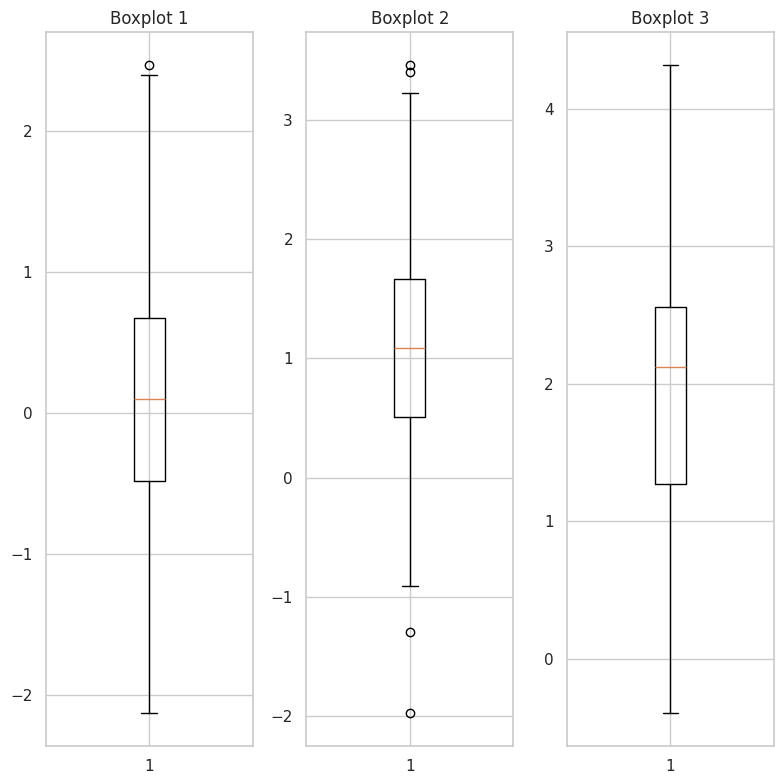

In [38]:
def plot_boxes():

    # Generating sample data for three boxplots
    np.random.seed(10)
    data1 = np.random.normal(loc=0, scale=1, size=100)
    data2 = np.random.normal(loc=1, scale=1, size=100)
    data3 = np.random.normal(loc=2, scale=1, size=100)
    
    # Creating subplots
    fig, axs = plt.subplots(1, 3, figsize=(8, 8))
    
    # Plotting the first boxplot
    axs[0].boxplot(data1)
    axs[0].set_title('Boxplot 1')
    
    # Plotting the second boxplot
    axs[1].boxplot(data2)
    axs[1].set_title('Boxplot 2')
    
    # Plotting the third boxplot
    axs[2].boxplot(data3)
    axs[2].set_title('Boxplot 3')
    
    # Adjusting layout
    plt.tight_layout()
    
    plt.show()
plot_boxes()

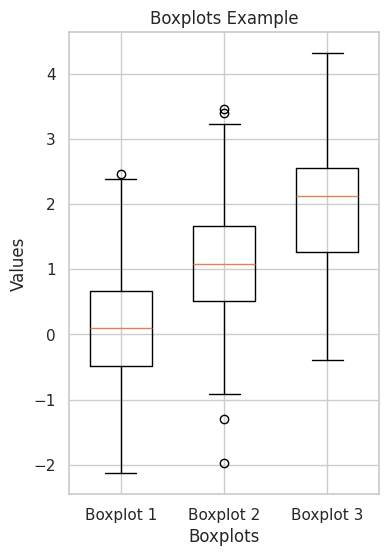

In [41]:
def plotplot():

    # Generating sample data for three boxplots
    np.random.seed(10)
    data1 = np.random.normal(loc=0, scale=1, size=100)
    data2 = np.random.normal(loc=1, scale=1, size=100)
    data3 = np.random.normal(loc=2, scale=1, size=100)
    
    # Creating the boxplots in one figure
    plt.figure(figsize=(4, 6))
    
    # Plotting the first boxplot
    plt.boxplot(data1, positions=[1], widths=0.6)
    
    # Plotting the second boxplot
    plt.boxplot(data2, positions=[2], widths=0.6)
    
    # Plotting the third boxplot
    plt.boxplot(data3, positions=[3], widths=0.6)
    
    # Adjusting the x-axis ticks and labels
    plt.xticks([1, 2, 3], ['Boxplot 1', 'Boxplot 2', 'Boxplot 3'])
    
    plt.title('Boxplots Example')
    plt.xlabel('Boxplots')
    plt.ylabel('Values')
    plt.grid(True)
    
    plt.show()

plotplot()

/tmp/ipykernel_290393/3032439369.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


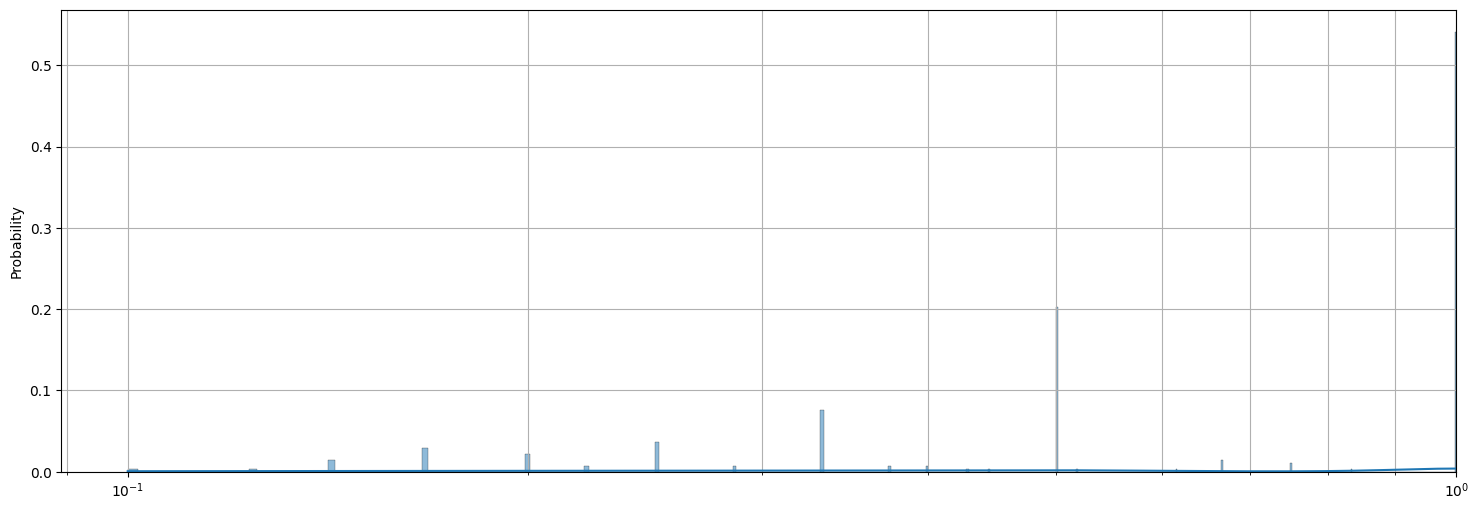

In [25]:
plot_distribution_symlogx(cc_p_values)

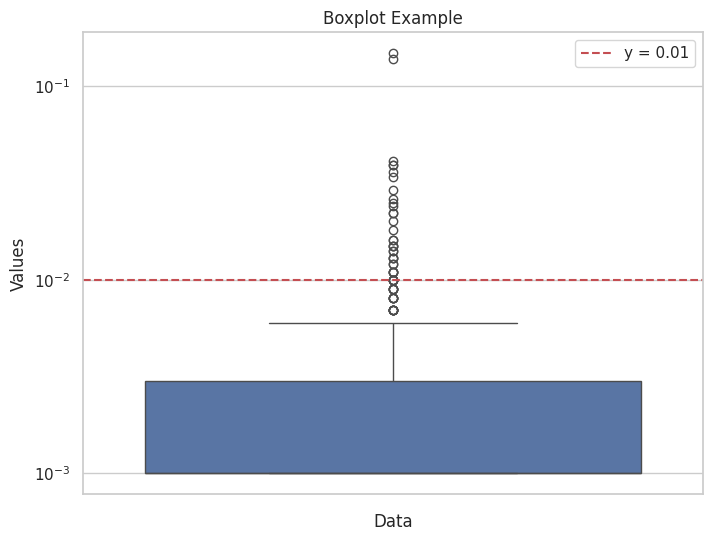

In [35]:
plot_boxplot(p_values)

# cinc

In [23]:
srctotgts, random_s2ts, model_s2ts = conllh.save_read_json(None,None,None, '../cinc_bartscore', mode='read')

In [24]:
# calculate p-value

cinc_p_values = []

for idx_global in range(len(srctotgts)):
    #if idx_global != 0: continue
    for i in range(len(srctotgts[idx_global])):
        ratio_sub = srctotgts[idx_global][i]
        less_number_sub = 0
        # for modified_sentence in random_sent[i]:
        for j in model_s2ts[idx_global][i]:
            if j>ratio_sub: less_number_sub+=1
        p_value = less_number_sub/len(model_s2ts[idx_global][i]) if less_number_sub>0 else 1/1000#1/len(model_s2ts[idx_global][i])#1/1000
        cinc_p_values.append(p_value)


# this is our metric, if we wanna calculate sum of difference, we can fix it based on this

/tmp/ipykernel_290393/3032439369.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


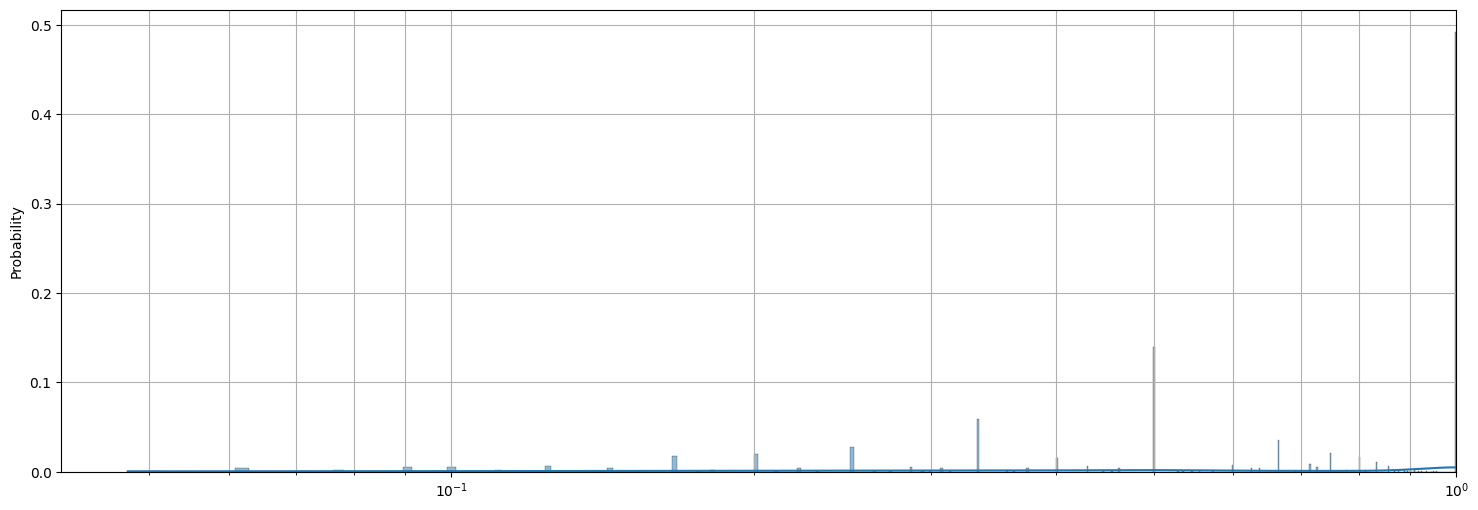

In [29]:
plot_distribution_symlogx(cinc_p_values)

# notcc

In [25]:
srctotgts, random_s2ts, model_s2ts = conllh.save_read_json(None,None,None, '../notcc_bartscore', mode='read')

In [26]:
# calculate p-value

notcc_p_values = []

for idx_global in range(len(srctotgts)):
    #if idx_global != 0: continue
    for i in range(len(srctotgts[idx_global])):
        ratio_sub = srctotgts[idx_global][i]
        less_number_sub = 0
        # for modified_sentence in random_sent[i]:
        for j in model_s2ts[idx_global][i]:
            if j>ratio_sub: less_number_sub+=1
        p_value = less_number_sub/len(model_s2ts[idx_global][i]) if less_number_sub>0 else 1/1000#1/len(model_s2ts[idx_global][i]) #1/1000
        notcc_p_values.append(p_value)


# this is our metric, if we wanna calculate sum of difference, we can fix it based on this

/tmp/ipykernel_290393/3032439369.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


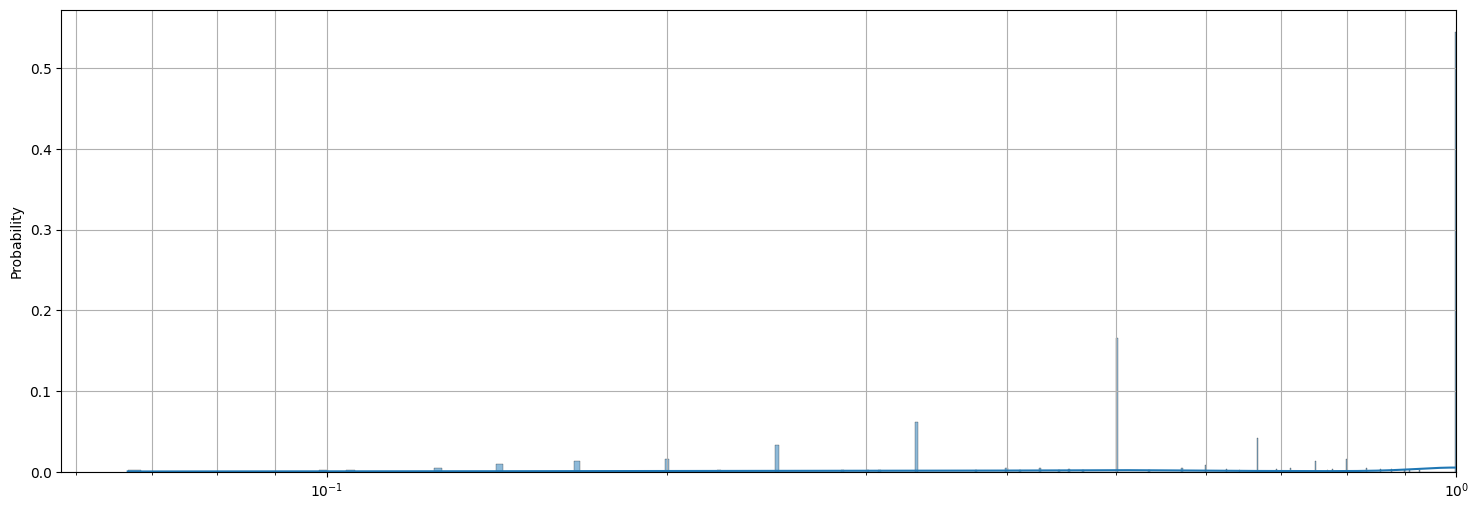

In [32]:
plot_distribution_symlogx(notcc_p_values)

# cnotc

In [27]:
# read srctotgts-->bartscore{sub} as numerator
# read model_s2ts-->bartscore_{i} and sum them for denominator
srctotgts, random_s2ts, model_s2ts = conllh.save_read_json(None,None,None, '../cnotc_bartscore', mode='read')

In [28]:
# calculate p-value

cnotc_p_values = []

for idx_global in range(len(srctotgts)):
    #if idx_global != 0: continue
    for i in range(len(srctotgts[idx_global])):
        ratio_sub = srctotgts[idx_global][i]
        less_number_sub = 0
        # for modified_sentence in random_sent[i]:
        for j in model_s2ts[idx_global][i]:
            if j>ratio_sub: less_number_sub+=1
        p_value = less_number_sub/1000 if less_number_sub>0 else 1e-3
        cnotc_p_values.append(p_value)


# this is our metric, if we wanna calculate sum of difference, we can fix it based on this

/tmp/ipykernel_286086/3032439369.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


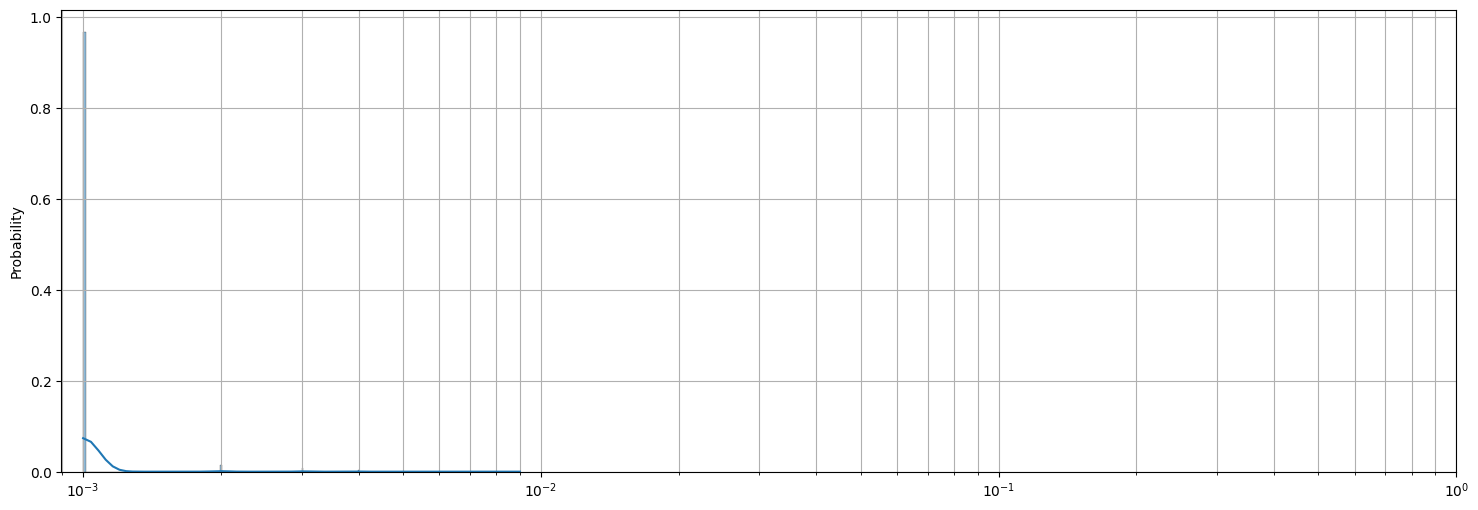

In [16]:
plot_distribution_symlogx(cnotc_p_values)

# notcnotc

In [29]:
# read srctotgts-->bartscore{sub} as numerator
# read model_s2ts-->bartscore_{i} and sum them for denominator
srctotgts, random_s2ts, model_s2ts = conllh.save_read_json(None,None,None, '../notcnotc_bartscore', mode='read')

In [30]:
# calculate p-value

notcnotc_p_values = []

for idx_global in range(len(srctotgts)):
    #if idx_global != 0: continue
    for i in range(len(srctotgts[idx_global])):
        ratio_sub = srctotgts[idx_global][i]
        less_number_sub = 0
        # for modified_sentence in random_sent[i]:
        for j in model_s2ts[idx_global][i]:
            if j>ratio_sub: less_number_sub+=1
        p_value = less_number_sub/1000 if less_number_sub>0 else 1e-3
        notcnotc_p_values.append(p_value)


# this is our metric, if we wanna calculate sum of difference, we can fix it based on this

/tmp/ipykernel_286086/3032439369.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1)


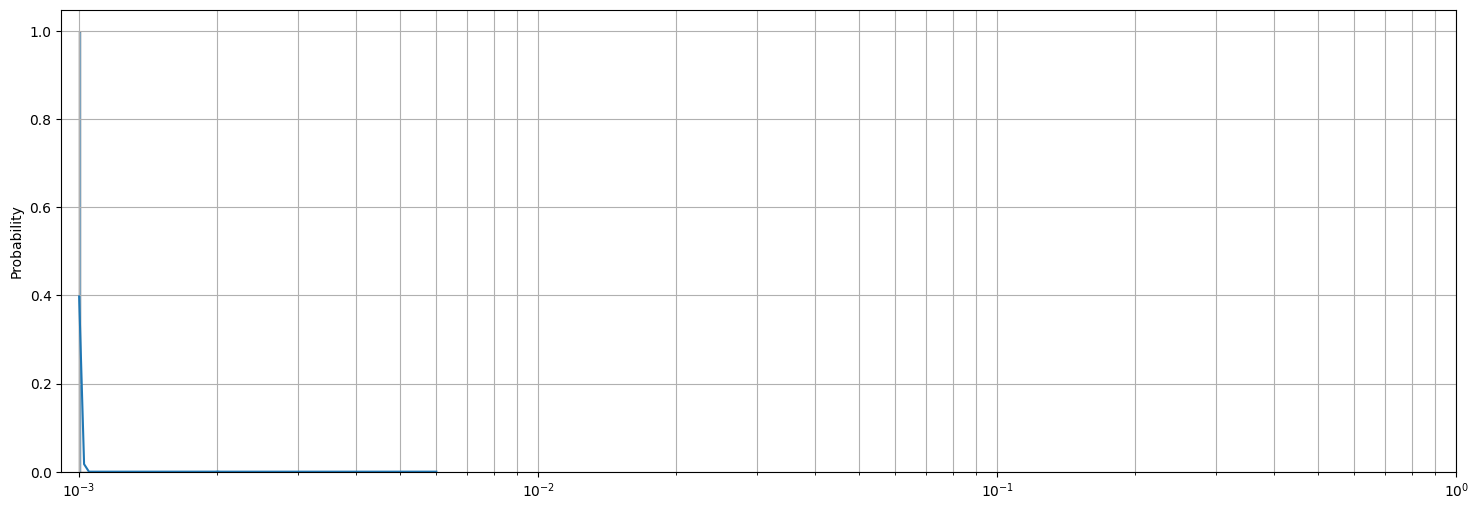

In [19]:
plot_distribution_symlogx(notcnotc_p_values)

# plot box plot

In [35]:
def plotplot(cc,cinc,notcc,cnotc,notcnotc):
    
    # Creating the boxplots in one figure
    plt.figure(figsize=(4, 6))
    
    # Plotting the first boxplot
    plt.boxplot(cc, positions=[1], widths=0.6)
    
    # Plotting the second boxplot
    plt.boxplot(cinc, positions=[2], widths=0.6)
    
    # Plotting the third boxplot
    plt.boxplot(notcc, positions=[3], widths=0.6)

    # Plotting the second boxplot
    plt.boxplot(cnotc, positions=[4], widths=0.6)
    
    # Plotting the third boxplot
    plt.boxplot(notcnotc, positions=[5], widths=0.6)
    
    # Adjusting the x-axis ticks and labels
    plt.xticks([1, 2, 3, 4, 5], ['cc', 'cinc', 'notcc', 'cnotc', 'notcnotc'])
    
    plt.title('p-value Boxplots')
    plt.xlabel('different categories')
    plt.ylabel('p-value in log domain')
    plt.yscale('log')
    # Plotting the line y = 0.01
    plt.axhline(y=0.01, color='r', linestyle='--', label='y = 0.01')
    # Setting the y-axis limit
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    
    plt.show()

/tmp/ipykernel_1944698/2054270415.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1, 1.1)


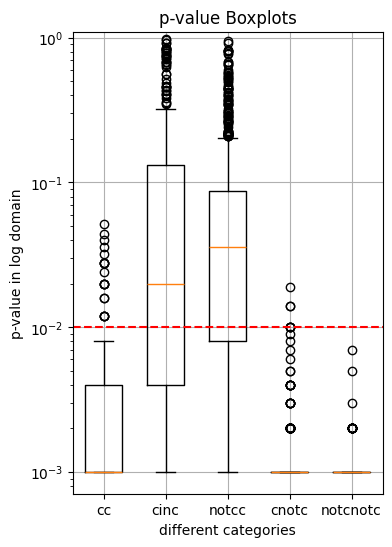

In [36]:
plotplot(cc_p_values,cinc_p_values,notcc_p_values,cnotc_p_values,notcnotc_p_values)

/tmp/ipykernel_1111932/2381889180.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1, 1.1)


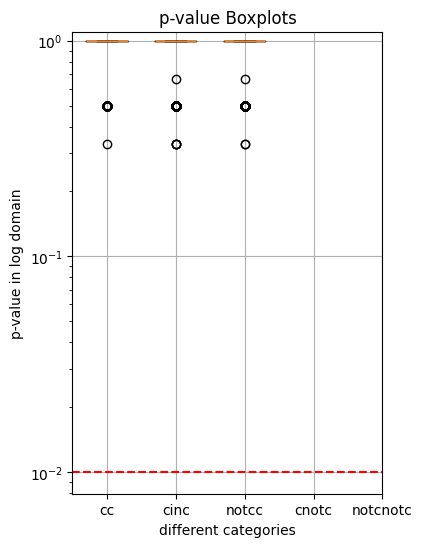

In [16]:
plotplot(cc_p_values,cinc_p_values,notcc_p_values,None,None)

# porpotion of below 0.01

In [37]:
[1 for i in cc_p_values if i<0.01].count(1)/len(cc_p_values)

0.8876404494382022

In [38]:
[1 for i in cinc_p_values if i<0.01].count(1)/len(cinc_p_values)

0.39867109634551495

In [39]:
[1 for i in notcc_p_values if i<0.01].count(1)/len(notcc_p_values)

0.2737789203084833

In [40]:
[1 for i in cnotc_p_values if i<0.01].count(1)/len(cnotc_p_values)

0.9986296006264683

In [41]:
[1 for i in notcnotc_p_values if i<0.01].count(1)/len(notcnotc_p_values)

1.0

# check sample correctness from some cases

In [108]:
def read_prediction_pre(data_path = '../../Sws_newbenchmark/confusion_data.json'):
    '''
    Input: prediction file path (str)
    Splits the file into:
    1. changenotchange
    2. changecorrect
    3. changeincorrect
    4. notchangenotchange
    5. notchangechange
    :return: each (sentence; substitution pair)
    '''
    with open(data_path, 'r') as file:
        loaded_dict = json.load(file)
    changecorrect = loaded_dict['changecorrect']
    changeincorrect = loaded_dict['changeincorrect']
    notchangechange = loaded_dict['notchangechange']

    cc_rand = loaded_dict['changecorrect_randomsample']
    cinc_rand = loaded_dict['changeincorrect_randomsample']
    notcc_rand = loaded_dict['notchangechange_randomsample']

    cc_model = loaded_dict['changecorrect_samplefrommodel']
    cinc_model = loaded_dict['changeincorrect_samplefrommodel']
    notcc_model = loaded_dict['notchangechange_samplefrommodel']

    # n1,n2,n3 = 0,0,0
    # for sentence in changecorrect:
    #     n1+=len(changecorrect[sentence])
    # for sentence in changeincorrect:
    #     n2+=len(changeincorrect[sentence])
    # for sentence in notchangechange:
    #     n3+=len(notchangechange[sentence])
    # print(n1,n2,n3)

    return changecorrect, changeincorrect, notchangechange,  \
        cc_rand, cinc_rand, notcc_rand, \
        cc_model, cinc_model, notcc_model

In [72]:
def read_prediction(data_path = '../confusion_data.json'):
    '''
    Input: prediction file path (str)
    Splits the file into:
    1. changenotchange
    2. changecorrect
    3. changeincorrect
    4. notchangenotchange
    5. notchangechange
    :return: each (sentence; substitution pair)
    '''
    with open(data_path, 'r') as file:
        loaded_dict = json.load(file)
    changecorrect = loaded_dict['changecorrect']
    changeincorrect = loaded_dict['changeincorrect']
    notchangechange = loaded_dict['notchangechange']
    changenotchange = loaded_dict["changenotchange"]
    notchangenotchange = loaded_dict["notchangenotchange"]

    cc_rand = loaded_dict['changecorrect_randomsample']
    cinc_rand = loaded_dict['changeincorrect_randomsample']
    notcc_rand = loaded_dict['notchangechange_randomsample']
    cnotc_rand = loaded_dict["changenotchange_randomsample"]
    notcnotc_rand = loaded_dict["notchangenotchange_randomsample"]

    cc_model = loaded_dict['changecorrect_samplefrommodel']
    cinc_model = loaded_dict['changeincorrect_samplefrommodel']
    notcc_model = loaded_dict['notchangechange_samplefrommodel']
    cnotc_model = loaded_dict["changenotchange_samplefrommodel"]
    notcnotc_model = loaded_dict["notchangenotchange_samplefrommodel"]

    # n1,n2,n3 = 0,0,0
    # for sentence in changecorrect:
    #     n1+=len(changecorrect[sentence])
    # for sentence in changeincorrect:
    #     n2+=len(changeincorrect[sentence])
    # for sentence in notchangechange:
    #     n3+=len(notchangechange[sentence])
    # print(n1,n2,n3)

    return changecorrect, changeincorrect, notchangechange, changenotchange, notchangenotchange, \
        cc_rand, cinc_rand, notcc_rand, cnotc_rand,notcnotc_rand,\
        cc_model, cinc_model, notcc_model,cnotc_model,notcnotc_model

In [118]:
cc, cinc, notcc,cnotc,notcnotc, cc_rand, cinc_rand, notcc_rand,cnotc_rand,notcnotc_rand, cc_model, cinc_model, notcc_model,cnotc_model,notcnotc_model = read_prediction()

In [121]:
def get_item_at_index(dictionary, index):
    items = list(dictionary.items())
    if index < 0 or index >= len(items):
        return None
    key, value = items[index]
    return key, value

# Example usage:
index = 16  # For the 15th position (0-indexed)
key, value = get_item_at_index(cnotc_model, index)
print(key)
#print(value)

These jobs can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.


In [122]:
cnotc_model[key]

[['These role can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.',
  'These malls can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.',
  'These employment can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.',
  'These strategies can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.',
  'These economics can bring me at least $4,800 a month in income, but staying up late will endanger my health, so I will choose to work for a period of time and then take a few months of rest.',
  'These occupations can br

In [113]:
cc, cinc, notcc,cc_rand, cinc_rand, notcc_rand, cc_model_pre, cinc_model_pre, notcc_model_pre = read_prediction_pre()

In [114]:
def get_item_at_index(dictionary, index):
    items = list(dictionary.items())
    if index < 0 or index >= len(items):
        return None
    key, value = items[index]
    return key, value

# Example usage:
index = 15  # For the 15th position (0-indexed)
key, value = get_item_at_index(cinc_model_pre, index)
print(key)
#print(value)

Second, students' social abilities are as crucial as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.


In [115]:
cinc_model_pre[key]

[["Second, students' social abilities are as critical as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.",
  "Second, students' social abilities are as essential as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.",
  "Second, students' social abilities are as key as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.",
  "Second, students' social abilities are as objective as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.",
  "Second, students' social abilities are as vital as learning. With equal financial support in classes, the school can provide more social activities to maintain students' social ability.",
  "Second, students' social abilitie